# **(ADD THE NOTEBOOK NAME HERE)**

## Objectives

* Create Data visualisations for clarity 

## Inputs

* Import Data visualisation tools Matplotlib, Seaborn and Plotly

## Outputs

* Write here which files, code or artefacts you generate by the end of the notebook 

## Additional Comments

* If you have any additional comments that don't fit in the previous bullets, please state them here. 



---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\ngubo\\Documents\\vscode-projects\\Capstone_Project_Fruit_Veg_Prices_UK\\jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\ngubo\\Documents\\vscode-projects\\Capstone_Project_Fruit_Veg_Prices_UK'

# Section 1

Section 1 content

Import libraries for Data visualisation

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

# Load the cleaned data
df = pd.read_csv('Dataset/Processed/fruitvegprices-2017_2022-cleaned.csv')

Print Data to double check it's correct

In [5]:
df.head(10)

,category,item,variety,date,price,unit,month,year,Season
0,fruit,apples,bramleys_seedling,2022-03-11,2.05,kg,3,2022,Off-season
1,fruit,apples,coxs_orange_group,2022-03-11,1.22,kg,3,2022,Off-season
2,fruit,apples,egremont_russet,2022-03-11,1.14,kg,3,2022,Off-season
3,fruit,apples,braeburn,2022-03-11,1.05,kg,3,2022,Off-season
4,fruit,apples,gala,2022-03-11,1.03,kg,3,2022,Off-season
5,fruit,apples,other_late_season,2022-03-11,0.85,kg,3,2022,Off-season
6,fruit,pears,conference,2022-03-11,0.77,kg,3,2022,Off-season
7,fruit,pears,doyenne_du_comice,2022-03-11,1.24,kg,3,2022,Off-season
8,vegetable,beetroot,beetroot,2022-03-11,0.52,kg,3,2022,Off-season
9,vegetable,brussels_sprouts,brussels_sprouts,2022-03-11,0.78,kg,3,2022,Off-season


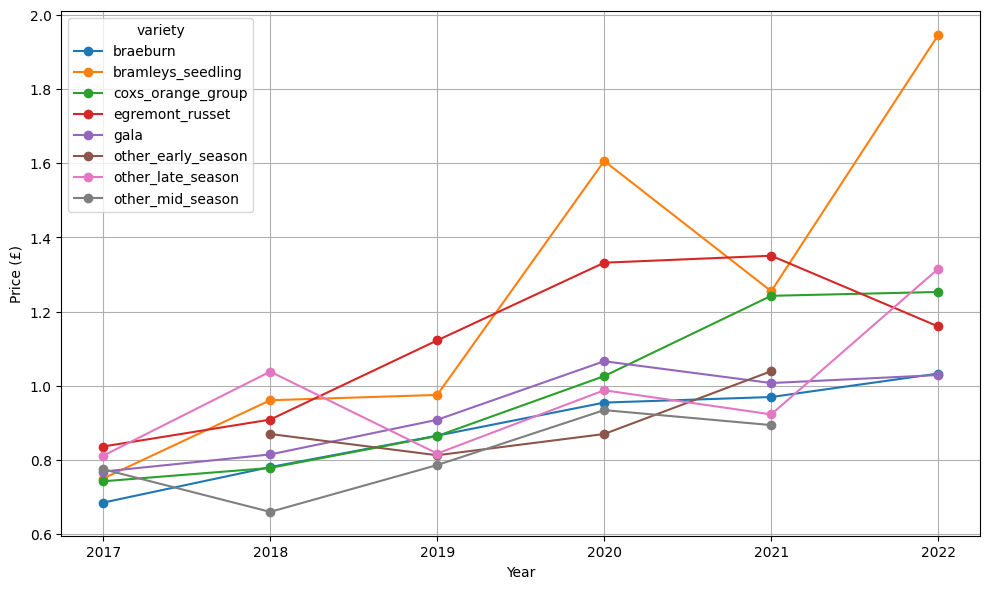

In [ ]:
# Filter data for apples only
apples = df[df['item'] == 'apples'].copy() 
# create a pivot table showing price by variety and year
apples_pivot = apples.pivot_table(index='year', columns='variety', values='price', aggfunc='mean')
apples_pivot.plot(figsize=(10,6), marker='o')
plt.ylabel('Price (£)')
plt.xlabel('Year')
plt.grid(True)
plt.tight_layout()
plt.show()


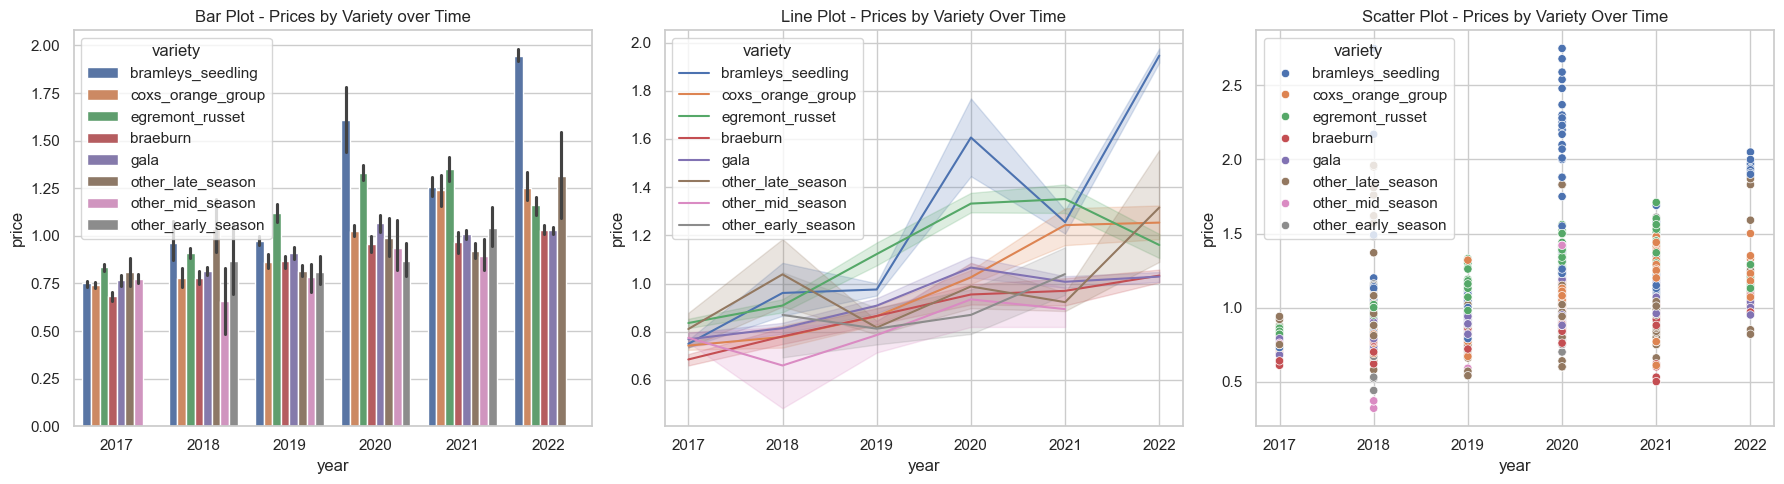

In [22]:
# Seaborn plots
fig, axs = plt.subplots(1, 3, figsize=(18, 5))  # 1 row, 3 columns

# --- 1. Bar Plot ---
sns.barplot(data=apples, x='year', y='price', hue='variety', ax=axs[0]) 
axs[0].set_title('Bar Plot - Prices by Variety over Time')

# --- 2. Line Plot ---
sns.lineplot(data=apples, x='year', y='price', hue='variety', ax=axs[1])
axs[1].set_title('Line Plot - Prices by Variety Over Time')

# --- 3. Scatter Plot ---
sns.scatterplot(data=apples, x='year', y='price', hue='variety', ax=axs[2])
axs[2].set_title('Scatter Plot - Prices by Variety Over Time')

plt.tight_layout()
plt.show()

In [39]:
# Interactive chart line for better visualization and specific points
fig = px.line(apples, x='date', y='price', color='variety', 
              title='Apple Price Over Time by Variety',
              markers=True) # Add markers for each data point
fig.show()
fig = px.scatter(x=[1,2,3], y=[4,5,6])
fig.write_image("scatter.png")  

Overall Price Trends (All Varieties):

Apple prices generally increased between 2017 and 2022.

There's a noticeable peak around 2022, especially for bramleys_seedling.

By Variety:

Bramleys_seedling had the highest prices overall, peaking significantly in 2022 (~£1.95).

Braeburn, gala, and cox's orange group tended to stay around £0.90–£1.30, more stable.

Other_mid_season, early_season, and late_season varieties were priced lower and more consistent, typically under £1.10.

Volatility & Consistency:

Error bars suggests that 2020 had the highest price volatility, possibly due to the COVID-19 pandemic which could have impacted production flow and supply chains routes.

Varieties like braeburn and gala show consistent pricing over time.

In [12]:
# Filter for cabbage data
cabbage_df = df[df['item'] == 'cabbage']


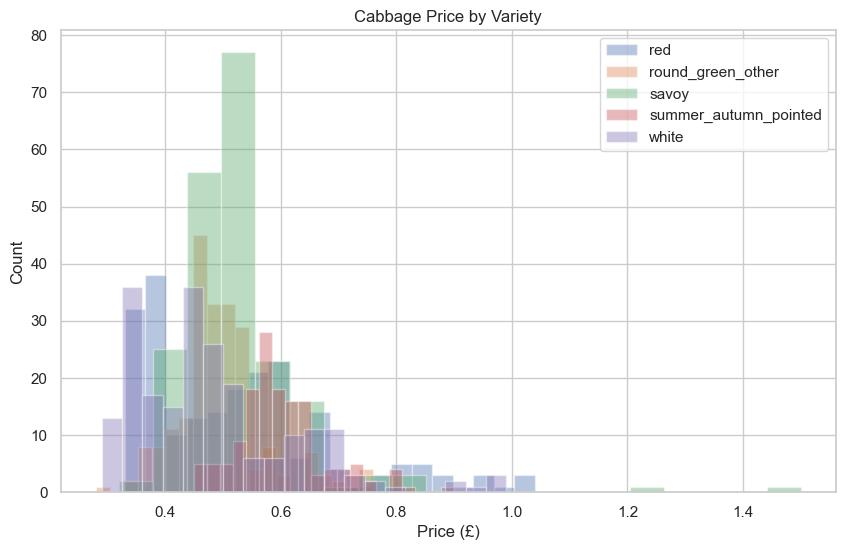

In [34]:
plt.figure(figsize=(10,6))
for var, grp in cabbage_df.groupby('variety'):
    plt.hist(grp['price'].dropna(), bins=20, alpha=0.4, label=var)
plt.title('Cabbage Price by Variety')
plt.xlabel('Price (£)')
plt.ylabel('Count')
plt.legend()
plt.show()

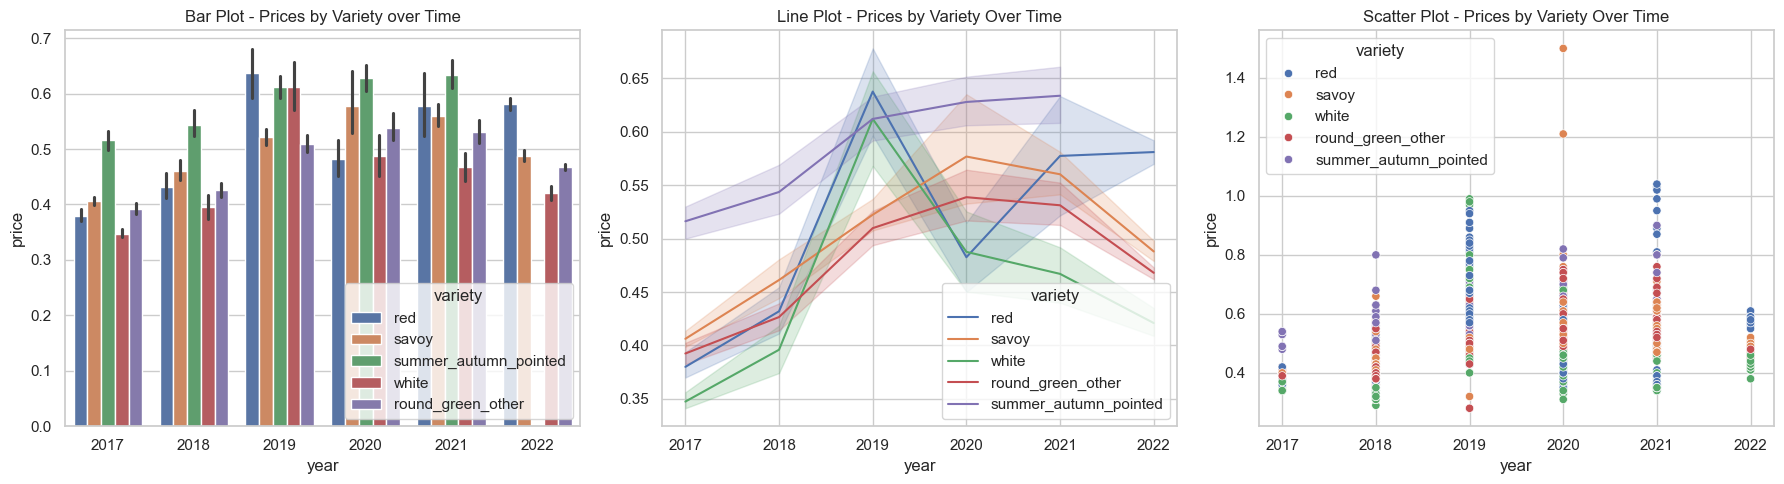

In [28]:
# Seaborn plots
fig, axs = plt.subplots(1, 3, figsize=(18, 5))  # 1 row, 3 columns

# --- 1. Bar Plot ---
sns.barplot(data=cabbage_df, x='year', y='price', hue='variety', ax=axs[0]) 
axs[0].set_title('Bar Plot - Prices by Variety over Time')

# --- 2. Line Plot ---
sns.lineplot(data=cabbage_df, x='year', y='price', hue='variety', ax=axs[1])
axs[1].set_title('Line Plot - Prices by Variety Over Time')

# --- 3. Scatter Plot ---
sns.scatterplot(data=cabbage_df, x='year', y='price', hue='variety', ax=axs[2])
axs[2].set_title('Scatter Plot - Prices by Variety Over Time')

plt.tight_layout()
plt.show()

# 1. Bar Plot
Prices are relatively stable but vary by variety and year.

Summer_autumn_pointed and white cabbage tend to have slightly higher prices across most years.

# 2. Line Plot
There was a noticeable price increase from 2018 to 2019 most notably red and white cabbage, then a drop or stabilization.

Red and summer_autumn_pointed show higher price volatility over time.

White cabbage had the most dramatic dip post-2019.

# 3. Scatter Plot

This chart reveals price spread (distribution) — e.g., outliers and clusters.

Some years have more price fluctuation (wider spread), especially savoy in 2020.

Clusters around certain price ranges indicate consistency.

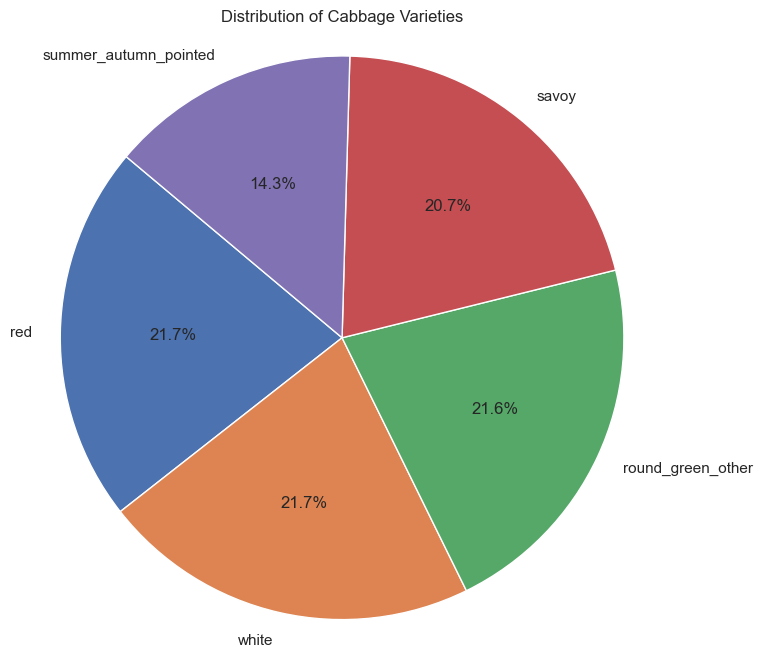

In [35]:
# Count number of entries per variety
variety_counts = cabbage_df['variety'].value_counts()

# Create pie chart
plt.figure(figsize=(8, 8))
plt.pie(variety_counts, labels=variety_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Cabbage Varieties')
plt.axis('equal')  # Equal aspect ratio ensures pie is drawn as a circle
plt.show()

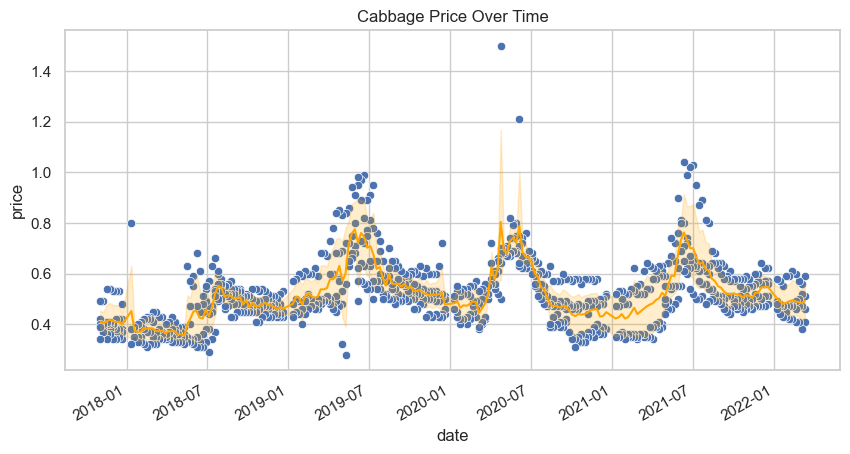

In [29]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,5))
sns.scatterplot(data=cabbage_df, x='date', y='price')
sns.lineplot(data=cabbage_df, x='date', y='price', color='orange')
plt.title('Cabbage Price Over Time')
plt.gcf().autofmt_xdate() # rotates & right-aligns dates
plt.show()


In [38]:
# Interactive chart line for better visualization and specific points
fig = px.line(cabbage_df, x='date', y='price', color='variety', 
              title='Cabbage Price Over Time',
              markers=True) # Add markers for each data point
fig.show()
fig = px.scatter(x=[1,2,3], y=[4,5,6])
fig.write_image("scatter.png")  

---

NOTE

* You may add as many sections as you want, as long as it supports your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---

# Push files to Repo

* In cases where you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [ ]:
import os
try:
  # create your folder here
  # os.makedirs(name='')
except Exception as e:
  print(e)


IndentationError: expected an indented block after 'try' statement on line 2 (553063055.py, line 5)